# skorch slurm run from March 18-20 ish, MULTI

In [1]:
import pandas as pd
import numpy as np
import utils as u
import matplotlib.pyplot as plt
import matplotlib

import altair as alt
import torch_utils as tu



In [2]:
log_data_filename = "data/XY_logTPM_opFilt.tsv"
XY_log = pd.read_csv(log_data_filename,sep='\t')

display(XY_log.head())

og_index      locus_tag                                    upstream_region  \
0         0  EQU24_RS00005  ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...   
1         1  EQU24_RS00010  GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...   
2         2  EQU24_RS00015  TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...   
3         4  EQU24_RS00025  GATGGGCGACATCGTCGAACCGCGCCGGGATTTCATCGTCAAGAAT...   
4        11  EQU24_RS00060  GAATTTTCGGGTTCGGGCATCAGCTACCGGGTATCGCCGGTACTCG...   

       uMax  lowO2_fast_growth    lowCH4      MeOH      NoCu     medCu  \
0  5.701712           5.159314  4.946232  4.544309  5.470820  5.489315   
1  5.906680           5.431592  5.067489  4.241518  5.897951  6.022614   
2  5.085045           4.772192  4.208764  4.205855  4.821135  4.878684   
3  5.604311           5.064503  4.983838  4.084119  5.639215  5.606737   
4  4.766245           4.767261  3.688497  3.422344  4.763636  4.687598   

     highCu     lowCu  highO2_slow_growth  NO3_lowO2_slow_growth  \
0  5.580793  5.425377            6.017577               5.002269   
1  6.305779  5.935676            6.629400               5.448133   
2  5.067555  4.849435            5.487238               4.416274   
3  5.604730  5.671486            6.282482               5.381454   
4  4.858654  4.698693            4.286940               4.525268   

   WithLanthanum  NoLanthanum  
0       5.148210     5.063677  
1       5.385163     5.449226  
2       4.367689     4.534353  
3       5.098383     5.404872  
4       5.031830     5.103249

In [3]:
condition_file = 'data/conditions_to_include.txt'
with open(condition_file,'r') as f:
    conditions = list(x.strip() for x in f.readlines())
    
cond_dict = dict(enumerate(conditions))
cond_dict

{0: 'uMax',
 1: 'lowO2_fast_growth',
 2: 'lowCH4',
 3: 'MeOH',
 4: 'NoCu',
 5: 'medCu',
 6: 'highCu',
 7: 'lowCu',
 8: 'highO2_slow_growth',
 9: 'NO3_lowO2_slow_growth',
 10: 'WithLanthanum',
 11: 'NoLanthanum'}

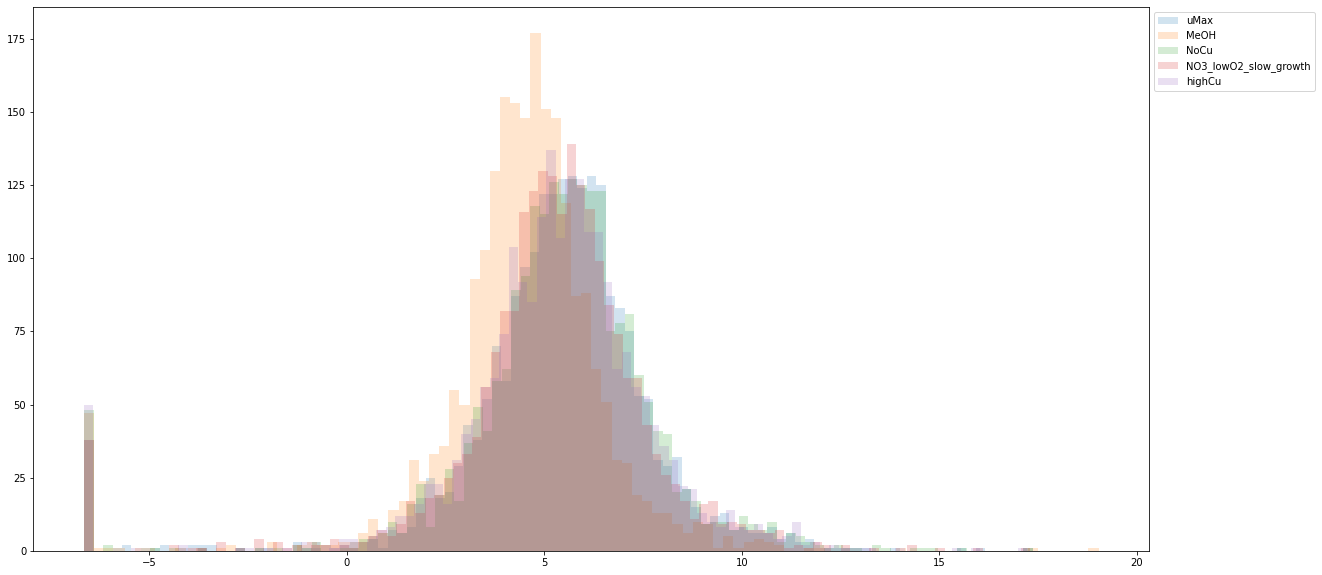

In [4]:
fig = plt.figure(figsize=(20,10))
for c in ['uMax','MeOH','NoCu','NO3_lowO2_slow_growth','highCu']:
    plt.hist(XY_log[c].values,bins=100,alpha=0.2,label=c)

plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

In [5]:
import seaborn as sns

In [6]:
df_melt = XY_log.melt(id_vars=['locus_tag'],value_vars=conditions, var_name="condition",value_name='log_tpm')
df_melt

locus_tag    condition    log_tpm
0      EQU24_RS00005         uMax   5.701712
1      EQU24_RS00010         uMax   5.906680
2      EQU24_RS00015         uMax   5.085045
3      EQU24_RS00025         uMax   5.604311
4      EQU24_RS00060         uMax   4.766245
...              ...          ...        ...
26443  EQU24_RS22110  NoLanthanum  12.312213
26444  EQU24_RS22115  NoLanthanum   4.037671
26445  EQU24_RS22125  NoLanthanum   5.479719
26446  EQU24_RS22130  NoLanthanum   5.433018
26447  EQU24_RS22155  NoLanthanum   8.361697

[26448 rows x 3 columns]

In [7]:
#sns.swarmplot(data=df_melt,x='log_tpm',y='condition')

<AxesSubplot:xlabel='log_tpm', ylabel='condition'>

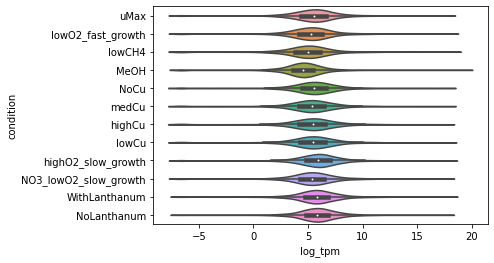

In [8]:
sns.violinplot(data=df_melt,x='log_tpm',y='condition')

## Looking at skorch slurm results

In [9]:
# res_df1 = pd.read_csv('pipe0/res_df.tsv',sep='\t')
# res_df2 = pd.read_csv('pipe1/res_df.tsv',sep='\t')
# res_df = pd.concat([res_df1, res_df2]).reset_index()
res_df = pd.read_csv('../hyak_scp_dump/skorch_mt_all/skorch_randcv_mt_all_skres_df.tsv',sep='\t')

In [10]:
res_df.sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
665    1262.230980    127.991865         0.040180        0.009934   
813     894.687980     12.280226         0.014727        0.001721   
48     1031.207995     65.149036         0.035882        0.006190   
548    1603.851631    262.974598         0.039012        0.009290   
133     358.303742     58.939279         0.010430        0.001139   
..             ...           ...              ...             ...   
87        0.005131      0.000209         0.000000        0.000000   
220       0.006751      0.000084         0.000000        0.000000   
523       0.006036      0.000169         0.000000        0.000000   
864       0.005321      0.000099         0.000000        0.000000   
577       0.006129      0.000057         0.000000        0.000000   

                           param_optimizer  param_module__num_filters2  \
665  <class 'torch.optim.rmsprop.RMSprop'>                         128   
813      <class 'torch.optim.adamw.AdamW'>                         128   
48   <class 'torch.optim.rmsprop.RMSprop'>                          64   
548      <class 'torch.optim.adamw.AdamW'>                          64   
133        <class 'torch.optim.adam.Adam'>                         128   
..                                     ...                         ...   
87   <class 'torch.optim.adagrad.Adagrad'>                         128   
220      <class 'torch.optim.adamw.AdamW'>                          64   
523  <class 'torch.optim.rmsprop.RMSprop'>                          16   
864      <class 'torch.optim.adamw.AdamW'>                          16   
577          <class 'torch.optim.sgd.SGD'>                          32   

     param_module__num_filters1  param_module__kernel_size2  \
665                         128                          16   
813                          64                          16   
48                          128                          12   
548                          64                          32   
133                          32                           8   
..                          ...                         ...   
87                           32                          32   
220                         128                          32   
523                         128                          32   
864                          32                          32   
577                         128                          32   

     param_module__kernel_size1  param_module__fc_node_num1  ...  \
665                           6                         100  ...   
813                           8                          50  ...   
48                            6                         100  ...   
548                           6                          50  ...   
133                          16                         100  ...   
..                          ...                         ...  ...   
87                           12                          25  ...   
220                           6                          50  ...   
523                           6                          50  ...   
864                          32                          10  ...   
577                          12                          10  ...   

                                                params  split0_test_score  \
665  {'optimizer': <class 'torch.optim.rmsprop.RMSp...          -4.293973   
813  {'optimizer': <class 'torch.optim.adamw.AdamW'...          -4.418702   
48   {'optimizer': <class 'torch.optim.rmsprop.RMSp...          -4.165278   
548  {'optimizer': <class 'torch.optim.adamw.AdamW'...          -4.195114   
133  {'optimizer': <class 'torch.optim.adam.Adam'>,...          -4.402779   
..                                                 ...                ...   
87   {'optimizer': <class 'torch.optim.adagrad.Adag...                NaN   
220  {'optimizer': <class 'torch.optim.adamw.AdamW'...                NaN   
523  {'optimizer': <

In [11]:
res_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_optimizer', 'param_module__num_filters2',
       'param_module__num_filters1', 'param_module__kernel_size2',
       'param_module__kernel_size1', 'param_module__fc_node_num1',
       'param_module__dropout2', 'param_module__dropout1',
       'param_module__conv_pool_size1', 'param_lr', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'opt_name'],
      dtype='object')

## ^^ split4 was clearly worst??

In [12]:
sm_res_df = res_df[
    ["rank_test_score",
     "mean_test_score",
     "std_test_score",
     "param_module__num_filters2",
     "param_module__num_filters1",
     "param_module__kernel_size2",
     "param_module__kernel_size1",
     "param_lr",
     "param_module__fc_node_num1",
     "param_module__conv_pool_size1",
     "param_module__dropout1",
     "param_module__dropout2",
     "opt_name"]]

In [13]:
alt.Chart(sm_res_df).mark_point(size=100).encode(
    x='rank_test_score:Q',
    y='mean_test_score:Q',
    #color=alt.Color('param_lr:Q',scale=alt.Scale(type='log',scheme='viridis')),
    color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    shape="opt_name:N",
    tooltip=["rank_test_score:Q","mean_test_score:Q","param_module__num_filters2:N","param_module__num_filters1:N","param_module__kernel_size2:N","param_module__kernel_size1:N","param_lr:N","param_module__fc_node_num1:N","opt_name:N"]
    
).interactive()

alt.Chart(...)

In [14]:
alt.Chart(sm_res_df).mark_point(size=100).encode(
    x=alt.X('param_module__kernel_size1:O',title="kernel size 1"),
    y='mean_test_score:Q',
    color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='opt_name:N',
#     detail='model_desc:N',
    shape="param_module__num_filters1:N",
    tooltip=["rank_test_score:O","param_module__num_filters1:N","param_module__num_filters2:N","param_module__kernel_size1:N","param_module__kernel_size2:N","param_lr:N","param_module__fc_node_num1:N"]
    
).interactive()

alt.Chart(...)

In [15]:
alt.Chart(sm_res_df).mark_point(size=100).encode(
    x=alt.X('param_module__kernel_size1:O',title="kernel size 1"),
    y='mean_test_score:Q',
    color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='param_module__num_filters1:N',
#     detail='model_desc:N',
    shape="opt_name:N",
    tooltip=["rank_test_score:O","param_module__num_filters1:N","param_module__kernel_size1:N","param_lr:N","param_module__fc_node_num1:N"]
    
).interactive()

alt.Chart(...)

In [16]:
alt.Chart(sm_res_df).mark_point(size=100).encode(
    x=alt.X('param_module__num_filters2:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='param_module__num_filters1:N',
#     detail='model_desc:N',
    shape="opt_name:N",
    tooltip=["rank_test_score:O","param_module__num_filters1:N","param_module__kernel_size1:N","param_lr:N","param_module__fc_node_num1:N"]
    
).interactive()

alt.Chart(...)

In [17]:
alt.Chart(sm_res_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('param_module__num_filters2:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    #color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='param_module__num_filters1:N',
#     detail='model_desc:N',
    #shape="opt_name:N",
    #tooltip=["rank_test_score:O","param_module__num_filters1:N","param_module__kernel_size1:N","param_lr:N","param_module__fc_node_num1:N"]
    
).interactive()

alt.Chart(...)

In [18]:
alt.Chart(sm_res_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('param_module__kernel_size1:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    #color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='param_module__kernel_size2:N',
#     detail='model_desc:N',
    #shape="opt_name:N",
    #tooltip=["rank_test_score:O","param_module__num_filters1:N","param_module__kernel_size1:N","param_lr:N","param_module__fc_node_num1:N"]
    
).interactive()

alt.Chart(...)

In [19]:
alt.Chart(sm_res_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('param_module__num_filters1:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    #color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='opt_name:N',
    row='param_lr:N',
).interactive(
).properties(
    height=100,
    width=100
)

alt.Chart(...)

In [20]:
alt.Chart(sm_res_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('param_module__kernel_size1:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    #color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='opt_name:N',
    row='param_lr:N',   
).interactive(
).properties(
    height=100,
    width=100
)

alt.Chart(...)

In [21]:
alt.Chart(sm_res_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('param_module__dropout1:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    column='opt_name:N',
    row='param_lr:N', 
).interactive(
).properties(
    height=100,
    width=100
)

alt.Chart(...)

In [22]:
alt.Chart(sm_res_df).mark_boxplot(extent='min-max').encode(
    x=alt.X('param_module__fc_node_num1:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    #color=alt.Color('param_lr:N',scale=alt.Scale(scheme='tableau10')),
    column='opt_name:N',
    row='param_lr:N',
).interactive(
).properties(
    height=100,
    width=100
)

alt.Chart(...)

In [32]:
top_df = sm_res_df.sort_values('rank_test_score').head(100)

alt.Chart(top_df).mark_point(size=100).encode(
    x=alt.X('param_module__num_filters1:O'),#title="kernel size 1"),
    y='mean_test_score:Q',
    color=alt.Color('rank_test_score:Q',scale=alt.Scale(scheme='viridis')),
    column='param_module__kernel_size1:N',
    shape='opt_name:N',
    row='param_lr:N',
).interactive(
).properties(
    height=100,
    width=100
)

alt.Chart(...)

In [14]:
# can I reload the model here and make predictions?

In [23]:
import pickle
import skorch
import torch
import scipy.stats

In [24]:
sk = pickle.load(open("../hyak_scp_dump/skorch_mt_all/skorch_randcv_mt_all.pkl",'rb'))


/home/ewilson6/anaconda3/envs/torch/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607369981906/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/ewilson6/anaconda3/envs/torch/lib/python3.8/site-packages/skorch/utils.py:539: DeviceWarning: Requested to load data to CUDA but no CUDA devices are available. Loading on device "cpu" instead.
  warnings.warn(
/home/ewilson6/anaconda3/envs/torch/lib/python3.8/site-packages/skorch/net.py:2333: DeviceWarning: Setting self.device = cpu since the requested device (cuda) is not available.
  

In [25]:
sk.best_estimator_

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=DNA_2CNN_Multi(
    (conv_net): Sequential(
      (0): Conv2d(1, 128, kernel_size=(4, 6), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.5, inplace=False)
      (4): Conv2d(128, 128, kernel_size=(1, 16), stride=(1, 1))
      (5): ReLU()
      (6): Dropout(p=0.0, inplace=False)
      (7): Flatten(start_dim=1, end_dim=-1)
      (8): Linear(in_features=10624, out_features=100, bias=True)
      (9): ReLU()
      (10): Linear(in_features=100, out_features=12, bias=True)
    )
  ),
)

In [26]:
sk.best_params_

{'optimizer': torch.optim.rmsprop.RMSprop,
 'module__num_filters2': 128,
 'module__num_filters1': 128,
 'module__kernel_size2': 16,
 'module__kernel_size1': 6,
 'module__fc_node_num1': 100,
 'module__dropout2': 0.0,
 'module__dropout1': 0.5,
 'module__conv_pool_size1': 3,
 'lr': 0.0005}

In [32]:
def make_mt_skorch_dfs(df,seq_col='seq',target_cols=['highCu','noCu']):
    '''
    Make multi-task X,y matrix,vec for skorch fit() loop.
    '''
    seqs = list(df[seq_col].values)        
    ohe_seqs = torch.stack([torch.tensor(u.one_hot_encode(x)) for x in seqs])

    # number of labels = len(target_cols)
    labels = torch.tensor(list(df[target_cols].values))
    # bad dimension? fixed in model.forward for now
    
    return ohe_seqs.float(), labels.float()

In [33]:
conditions

['uMax',
 'lowO2_fast_growth',
 'lowCH4',
 'MeOH',
 'NoCu',
 'medCu',
 'highCu',
 'lowCu',
 'highO2_slow_growth',
 'NO3_lowO2_slow_growth',
 'WithLanthanum',
 'NoLanthanum']

In [34]:
# get data
train_df = pd.read_csv('../hyak_scp_dump/skorch_mt_all/train_df.tsv',sep='\t').fillna("")
val_df = pd.read_csv('../hyak_scp_dump/skorch_mt_all/val_df.tsv',sep='\t').fillna("")
test_df = pd.read_csv('../hyak_scp_dump/skorch_mt_all/test_df.tsv',sep='\t').fillna("")


Xtrain, ytrain = make_mt_skorch_dfs(train_df, seq_col='upstream_region',target_cols=conditions)
Xval, yval = make_mt_skorch_dfs(val_df, seq_col='upstream_region',target_cols=conditions)
Xtest, ytest = make_mt_skorch_dfs(test_df, seq_col='upstream_region',target_cols=conditions)


In [27]:
best = sk.best_estimator_

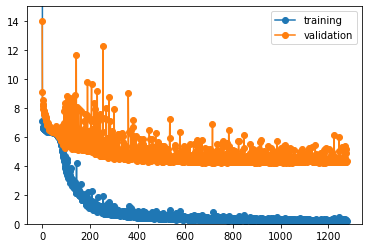

In [30]:
train_loss = best.history[:, 'train_loss']
valid_loss = best.history[:, 'valid_loss']

plt.plot(train_loss, 'o-', label='training')
plt.plot(valid_loss, 'o-', label='validation')
plt.legend()
plt.ylim(0,15)
plt.show()

In [31]:
sk.best_params_

{'optimizer': torch.optim.rmsprop.RMSprop,
 'module__num_filters2': 128,
 'module__num_filters1': 128,
 'module__kernel_size2': 16,
 'module__kernel_size1': 6,
 'module__fc_node_num1': 100,
 'module__dropout2': 0.0,
 'module__dropout1': 0.5,
 'module__conv_pool_size1': 3,
 'lr': 0.0005}

In [35]:
ytrain_pred = best.predict(Xtrain)
yval_pred = best.predict(Xval)
ytest_pred = best.predict(Xtest)

p_train = scipy.stats.pearsonr(np.array(ytrain).flatten(),ytrain_pred.flatten())
p_val = scipy.stats.pearsonr(np.array(yval).flatten(),yval_pred.flatten())
p_test = scipy.stats.pearsonr(np.array(ytest).flatten(),ytest_pred.flatten())


In [36]:
def parity_plot_multi(model,ytrue,ypred, pearson,rigid=False):
    for c in cond_dict:
        plt.scatter(ytrue[:,c],ypred[:,c],color=f'C{c}',label=cond_dict[c],alpha=0.2)
        
    
    #plt.scatter(ytrue, ypred, alpha=0.2)
    
    # y=x line
    xpoints = ypoints = plt.xlim()
    if rigid:
        plt.ylim(min(xpoints),max(xpoints)) 
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False)

    plt.xlabel("Actual Score",fontsize=14)
    plt.ylabel("Predicted Score",fontsize=14)
    plt.title(f"{model} (pearson:{pearson:.3f})",fontsize=20)
    plt.legend(bbox_to_anchor=(1,1),loc='upper left')
    plt.show()

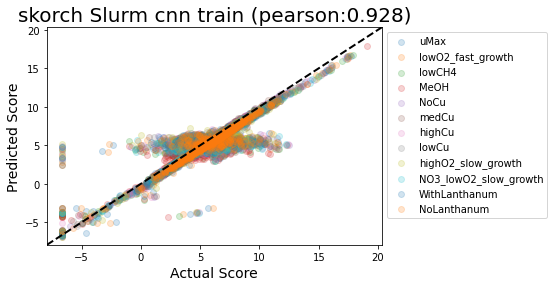

In [37]:
parity_plot_multi(
    "skorch Slurm cnn train", 
    ytrain, 
    ytrain_pred,
    p_train[0],
    rigid=True)


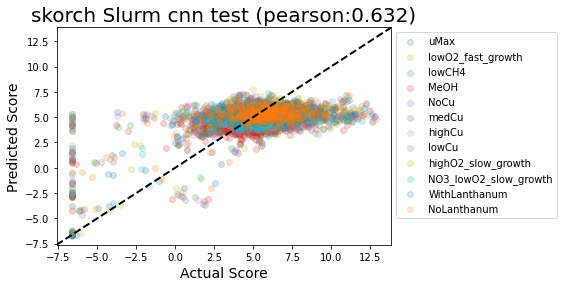

In [38]:
parity_plot_multi(
    "skorch Slurm cnn test", 
    ytest, 
    ytest_pred,
    p_test[0],
    rigid=True)

In [39]:
def view_multi_parity(title,ytrue,ypred,rigid=False, num_cols=4):

    num_plts = ytrue.shape[1]
    num_rows = int(np.ceil(num_plts/num_cols))
    
    max_point = max(max(ytrue.flatten()),max(ypred.flatten()))
    min_point = min(min(ytrue.flatten()),min(ypred.flatten()))
    
    plt.figure(figsize=(10, 8))
    

    for c in cond_dict:
        
        # display raw filter
        ax1 = plt.subplot(num_rows, num_cols,c+1)
        yt = ytrue[:,c]
        yp = ypred[:,c]
        p = scipy.stats.pearsonr(yt,yp)[0]
        
        ax1.scatter(yt,yp,color=f'C{c}',label=cond_dict[c],alpha=0.2)
        #ax1.set_title(f"{cond_dict[c]} (pearsonr:{p:.3f})")
        ax1.set_title(f"{cond_dict[c]} (p:{p:.3f})")
        if rigid:
            plt.ylim(min_point,max_point)
        ax1.plot([min_point,max_point], [min_point,max_point], linestyle='--', color='k', lw=2, scalex=False, scaley=False)
        plt.xlabel("Actual Value")
        plt.ylabel("Predicted Value")
    plt.suptitle(title,fontsize=22)
    
    plt.tight_layout()

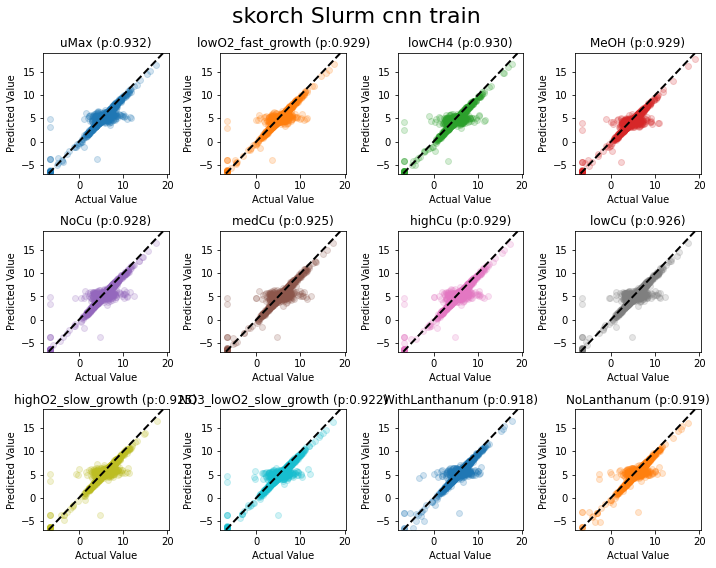

In [40]:
view_multi_parity("skorch Slurm cnn train", 
    ytrain, 
    ytrain_pred,
    rigid=True)

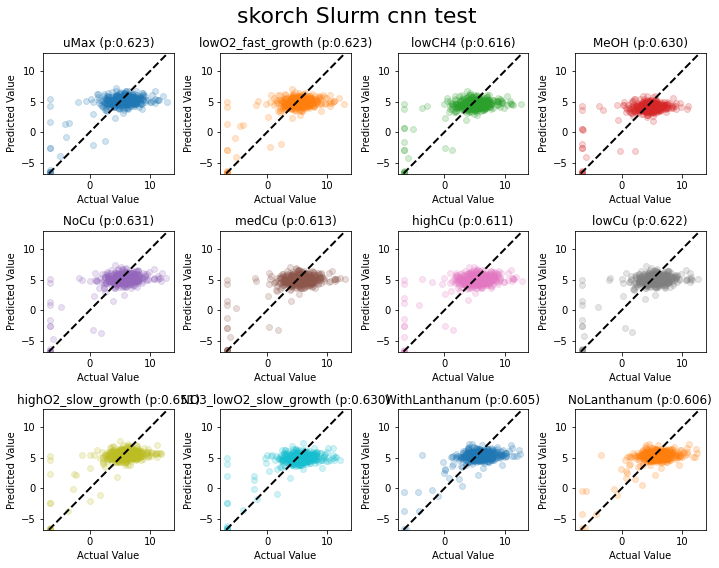

In [41]:
view_multi_parity("skorch Slurm cnn test", 
    ytest, 
    ytest_pred,
    rigid=True)

In [42]:
def view_multi_train_test_parity(
    title,
    ytrain_true,
    ytrain_pred,
    ytest_true,
    ytest_pred,
    rigid=False, 
    num_cols=2):

    num_plts = ytrain_true.shape[1]
    num_rows = int(np.ceil(num_plts/num_cols))
    
    max_point = max(max(ytrain_true.flatten()),max(ytrain_pred.flatten()))
    min_point = min(min(ytrain_true.flatten()),min(ytrain_pred.flatten()))
    
    plt.figure(figsize=(10, 20))
    

    for c in cond_dict:
        
        # display raw filter
        ax1 = plt.subplot(num_rows, num_cols,c+1)
        
        ax1.scatter(ytrain_true,ytrain_pred,label=f"{cond_dict[c]} Train",alpha=0.07)
        ax1.scatter(ytest_true,ytest_pred,label=f"{cond_dict[c]} Test",alpha=0.07)
        #ax1.set_title(f"{cond_dict[c]} (pearsonr:{p:.3f})")
        ax1.set_title(f"{cond_dict[c]}")
        if rigid:
            plt.ylim(min_point,max_point)
        ax1.plot([min_point,max_point], [min_point,max_point], linestyle='--', color='k', lw=2, scalex=False, scaley=False)
        plt.xlabel("Actual Value")
        plt.ylabel("Predicted Value")
    plt.suptitle(title,fontsize=22)
    
    plt.tight_layout()

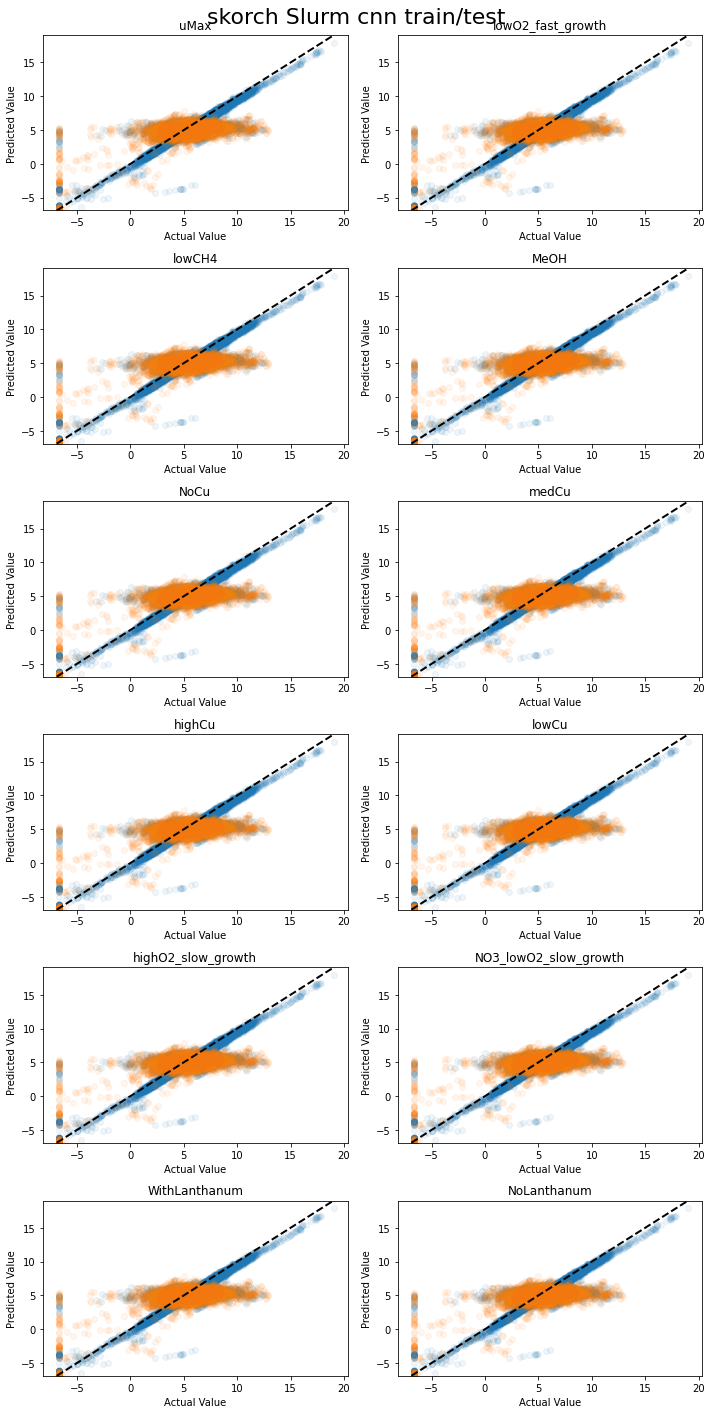

In [43]:
view_multi_train_test_parity(
    "skorch Slurm cnn train/test", 
    ytrain, 
    ytrain_pred,
    ytest, 
    ytest_pred,
    rigid=True)

In [44]:
def get_conv_layers_from_model(model):
    '''
    Given a trained model, extract its convolutional layers
    '''
    model_children = list(model.children())
    
    # counter to keep count of the conv layers
    model_weights = [] # we will save the conv layer weights in this list
    conv_layers = [] # we will save the actual conv layers in this list
    bias_weights = []
    counter = 0 

    # append all the conv layers and their respective weights to the list
    for i in range(len(model_children)):
        # get model type of Conv1d
        if type(model_children[i]) == nn.Conv2d:
            counter += 1
            model_weights.append(model_children[i].weight)
            conv_layers.append(model_children[i])
            bias_weights.append(model_children[i].bias)

        # also check sequential objects' children for conv1d
        elif type(model_children[i]) == nn.Sequential:
            for child in model_children[i]:
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
                    bias_weights.append(child.bias)

    print(f"Total convolutional layers: {counter}")
    return conv_layers, model_weights, bias_weights

def view_filters(model_weights, num_cols=8):
    # squeeze for conv2d??
    model_weights = model_weights[0].squeeze(1)
    num_filt = model_weights.shape[0]
    filt_width = model_weights[0].shape[1]
    num_rows = int(np.ceil(num_filt/num_cols))
    
    # visualize the first conv layer filters
    plt.figure(figsize=(20, 17))

    for i, filter in enumerate(model_weights):
        ax = plt.subplot(num_rows, num_cols, i+1)
        ax.imshow(filter.detach(), cmap='gray')
        ax.set_yticks(np.arange(4))
        ax.set_yticklabels(['A', 'C', 'G','T'])
        ax.set_xticks(np.arange(filt_width))
        ax.set_title(f"Filter {i}")

    plt.tight_layout()
    plt.show()
    
def get_conv_output_for_seq(seq, conv_layer):
    '''
    Given an input sequeunce, get the output tensor containing the filter activations
    '''
    #print(f"Running seq {seq}")
    # format seq for input to conv layer (OHE, reshape)
    seq = torch.tensor(u.one_hot_encode(seq)).view(-1,len(seq),4).permute(0,2,1).unsqueeze(0)
    # OHE FIX??
    # run through conv layer
    with torch.no_grad(): # don't want as part of gradient graph?
        res = conv_layer(seq.float())
        return res[0]
    

def get_filter_activations(seqs, conv_layer):
    '''
    Given a set of input sequences and a trained convolutional layer, 
    determine the subsequences for which each filter in the conv layer 
    activate most strongly. 
    
    1.) Run inputs through conv layer. 
    2.) Loop through filter activations of the resulting tensor, saving the
            position where filter activations were >0. 
    3.) Compile a count matrix for each filter by accumulating subsequences which
            activate the filter
    '''
    # initialize dict of pwms for each filter in the conv layer
    num_filters = conv_layer.out_channels
    filt_width = conv_layer.kernel_size[1]
    filter_pwms = dict((i,torch.zeros(4,filt_width)) for i in range(num_filters))
    
    print("Num filters", num_filters)
    print("filt_width", filt_width)
    #print("filter_pwms", filter_pwms)
    
    # loop through a set of sequences and collect subseqs where each filter activated
    for seq in seqs:
        res = get_conv_output_for_seq(seq, conv_layer)
        # for each filter and it's activation vector
        for filt_id,act_vec in enumerate(res):
            act_idxs = torch.where(act_vec>0)[1]
            activated_positions = [x.item() for x in act_idxs]
            # get subsequences that caused filter to activate
            for pos in activated_positions:
                subseq = seq[pos:pos+filt_width]
                #print("subseq",pos, subseq)
                #subseq_tensor = torch.tensor(u.one_hot_encode(subseq)).view(-1,filt_width,4).permute(0,2,1).squeeze(0)
                #subseq_tensor = torch.tensor(u.one_hot_encode(subseq)).permute(0,2,1).squeeze(0)
                # OHE FIX??
                subseq_tensor = torch.tensor(u.one_hot_encode(subseq)).T
                # add this subseq to the pwm count for this filter
                filter_pwms[filt_id] += subseq_tensor            
            
    return filter_pwms

import logomaker
def view_filters_and_logos(model_weights,filter_activations, num_cols=8):
    #print(model_weights[0].shape)
    model_weights = model_weights[0].squeeze(1)
    print(model_weights.shape)
    seq_len = model_weights.shape[-1]
    
    assert(model_weights.shape[0] == len(filter_activations))
    # make sure the model weights agree with the number of filters
    num_filts = len(filter_activations)
    num_rows = int(np.ceil(num_filts/num_cols))*2+1 # not sure why +1 is needed... complained otherwise
    
    plt.figure(figsize=(20, 40))

    j=0 # use to make sure a filter and it's logo end up vertically paired
    for i, filter in enumerate(model_weights):
        if (i)%num_cols == 0:
            j += num_cols
    #     print('i:', i)
    #     print('j:', j)
    #     print('i%8 == 0', i%8 == 0)
    # #     print('i+1%9 =?', (i+1)%9)
    #     print("i+j+1=", i+j+1)
    #     print("i+j+1+4=", i+j+1+8)
    #     print("*******")

        # display raw filter
        ax1 = plt.subplot(num_rows, num_cols, i+j+1)
        ax1.imshow(filter.detach(), cmap='gray')
        ax1.set_yticks(np.arange(4))
        ax1.set_yticklabels(['A', 'C', 'G','T'])
        ax1.set_xticks(np.arange(seq_len))
        ax1.set_title(f"Filter {i}")

        # display sequence logo
        ax2 = plt.subplot(num_rows, num_cols, i+j+1+num_cols)
        filt_df = pd.DataFrame(filter_activations[i].T.numpy(),columns=['A','C','G','T'])
        filt_df_info = logomaker.transform_matrix(filt_df,from_type='counts',to_type='information')
        logo = logomaker.Logo(filt_df_info,ax=ax2)
        ax2.set_ylim(0,2)
        ax2.set_title(f"Filter {i}")

    plt.tight_layout()

In [45]:
train_seqs = train_df['upstream_region'].values

def view_conv_filters_for_cnn(cnn,seqs):
    conv_layers, model_weights, bias_weights = get_conv_layers_from_model(cnn)
    #view_filters(model_weights)
    filter_activations = get_filter_activations(seqs, conv_layers[0])
    view_filters_and_logos(model_weights,filter_activations)

In [46]:
from torch import nn

Total convolutional layers: 2
Num filters 128
filt_width 6
torch.Size([128, 4, 6])


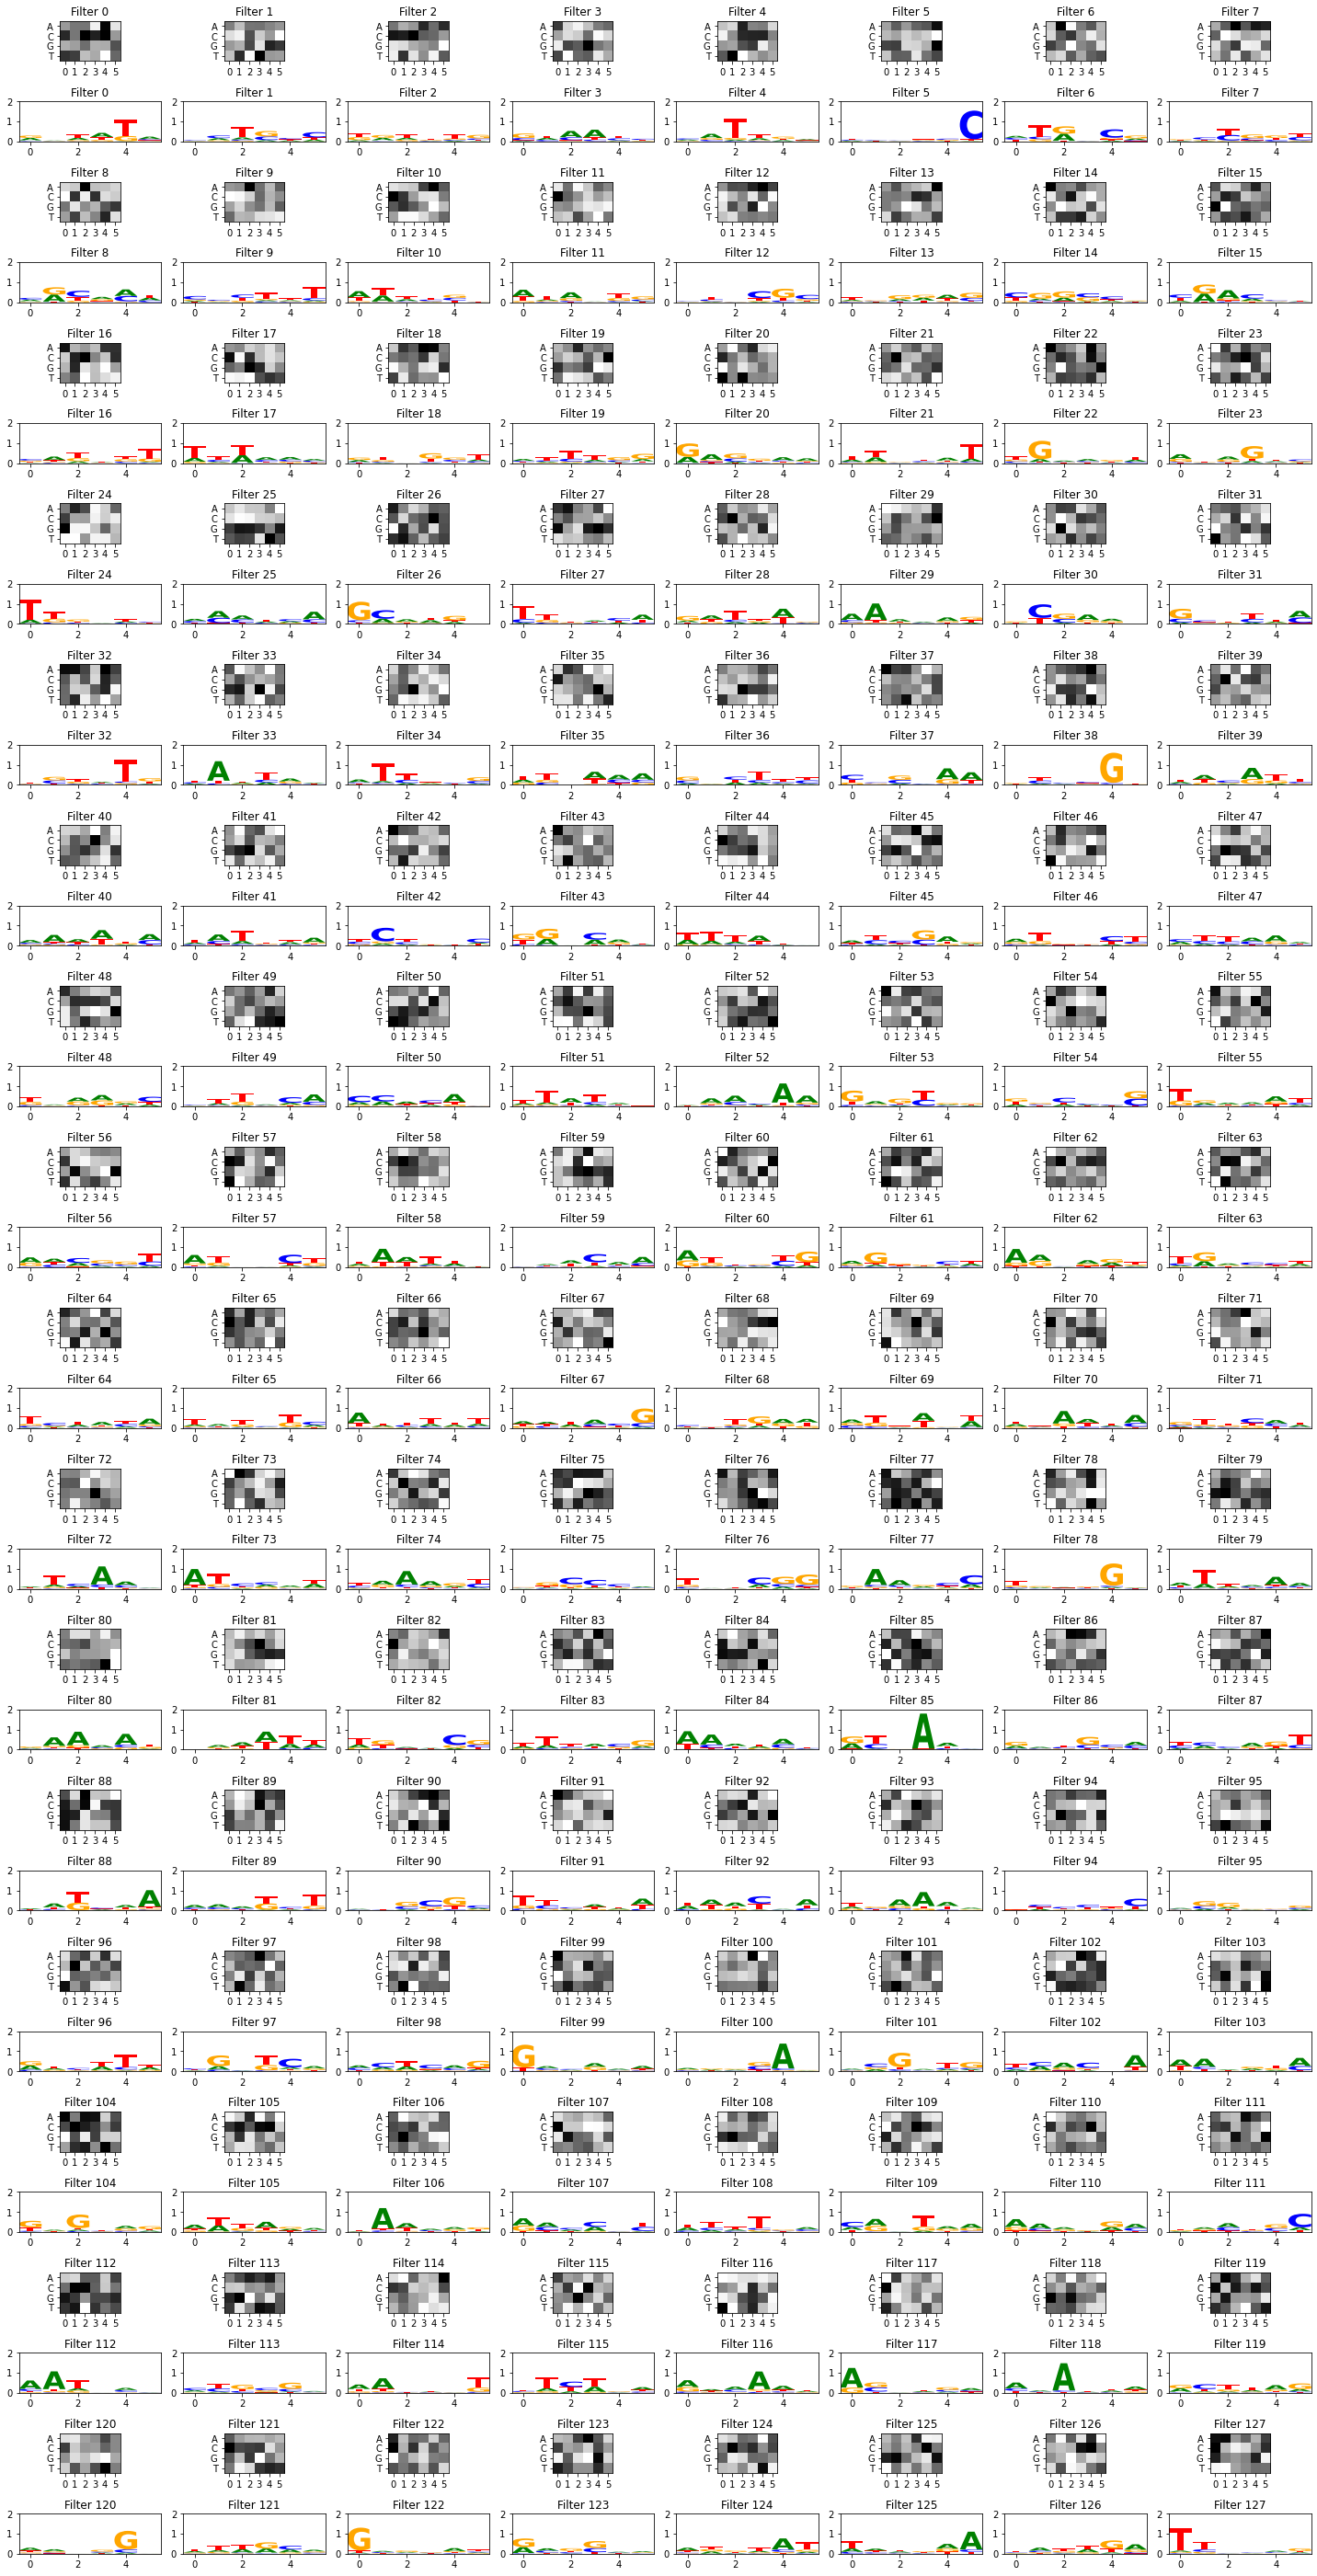

In [47]:
view_conv_filters_for_cnn(best.module_,train_seqs)